In [20]:
import cv2
import urllib.request
from google.colab.patches import cv2_imshow

In [2]:
print(cv2.__version__)

4.7.0


In [14]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [36]:
test1= cv2.imread('/content/test1.jpg')
test2= cv2.imread('/content/test2.jpg')

In [41]:
def opencvDetect1(image):
  faces = face_cascade.detectMultiScale(image , scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
  for (x, y, width, height) in faces:
    cv2.rectangle(image, (x, y), (x+width, y+height), (0, 0, 255), 2)
  cv2_imshow(image)
  cv2.destroyAllWindows()


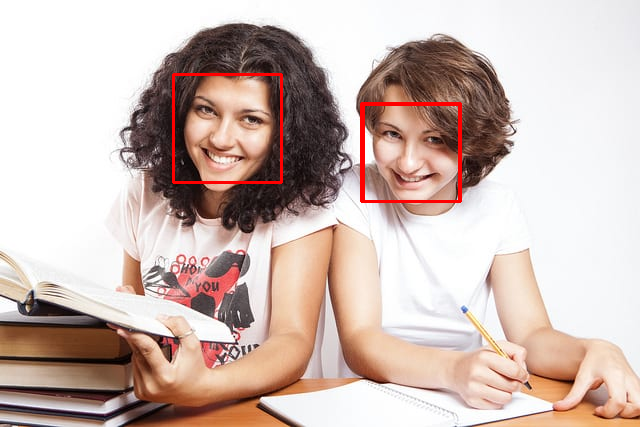

In [42]:
opencvDetect1(test1)

In [43]:
def opencvDetect2(image):
  faces = face_cascade.detectMultiScale(image , scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
  for (x, y, width, height) in faces:
    cv2.rectangle(image, (x, y), (x+width, y+height), (0, 0, 255), 2)
  cv2_imshow(image)
  cv2.destroyAllWindows()

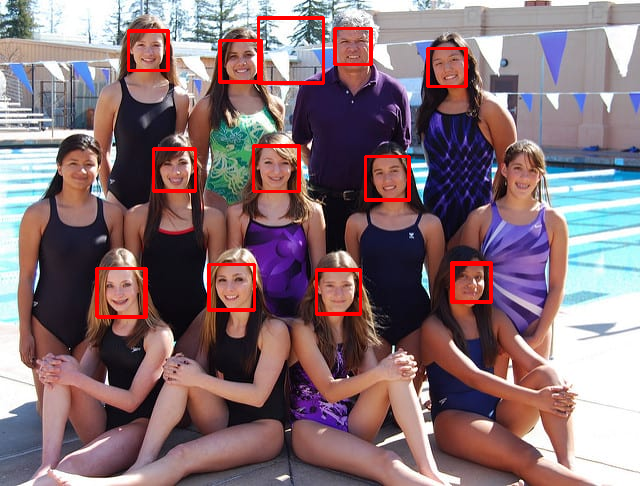

In [44]:
opencvDetect2(test2)

In [45]:
# Deep learning

In [46]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.9 MB/s eta 0:00:00


In [48]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: keras, opencv-python
Required-by: 


In [87]:
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [50]:
print(mtcnn.__version__)

0.1.0


In [57]:
filename1= '/content/test1.jpg'
filename2 = '/content/test2.jpg'

In [78]:
def deepDetect(image):
  image= plt.imread(image)
  detector = MTCNN()
  faces = detector.detect_faces(image)
  result=[]
  for face in faces:
    result.append(face)
  return result

In [79]:
deepDetect(filename1)

1/1 [==============================] - 0s 157ms/step


[{'box': [373, 83, 100, 129],
  'confidence': 0.9998095035552979,
  'keypoints': {'left_eye': (392, 132),
   'right_eye': (436, 139),
   'nose': (403, 171),
   'mouth_left': (390, 171),
   'mouth_right': (438, 177)}},
 {'box': [185, 68, 91, 118],
  'confidence': 0.9993303418159485,
  'keypoints': {'left_eye': (208, 110),
   'right_eye': (252, 119),
   'nose': (220, 143),
   'mouth_left': (200, 148),
   'mouth_right': (245, 159)}}]

In [80]:
deepDetect(filename2)

3/3 [==============================] - 0s 30ms/step


[{'box': [319, 268, 33, 42],
  'confidence': 0.9999778866767883,
  'keypoints': {'left_eye': (330, 286),
   'right_eye': (345, 285),
   'nose': (338, 296),
   'mouth_left': (331, 301),
   'mouth_right': (345, 301)}},
 {'box': [225, 40, 32, 40],
  'confidence': 0.999907374382019,
  'keypoints': {'left_eye': (233, 56),
   'right_eye': (248, 55),
   'nose': (241, 63),
   'mouth_left': (234, 70),
   'mouth_right': (249, 69)}},
 {'box': [432, 44, 34, 46],
  'confidence': 0.9998452663421631,
  'keypoints': {'left_eye': (439, 63),
   'right_eye': (454, 59),
   'nose': (447, 70),
   'mouth_left': (443, 78),
   'mouth_right': (457, 74)}},
 {'box': [61, 150, 34, 39],
  'confidence': 0.9997920989990234,
  'keypoints': {'left_eye': (73, 164),
   'right_eye': (88, 164),
   'nose': (82, 172),
   'mouth_left': (73, 177),
   'mouth_right': (88, 178)}},
 {'box': [260, 145, 32, 44],
  'confidence': 0.9997247457504272,
  'keypoints': {'left_eye': (268, 162),
   'right_eye': (284, 163),
   'nose': (276, 1

In [83]:
def deepBbox(img):
  image= plt.imread(img)
  plt.imshow(image)
  ax = plt.gca()
  results = deepDetect(img)
  for result in results:
    x, y, width, height = result['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
  plt.show()

1/1 [==============================] - 0s 176ms/step


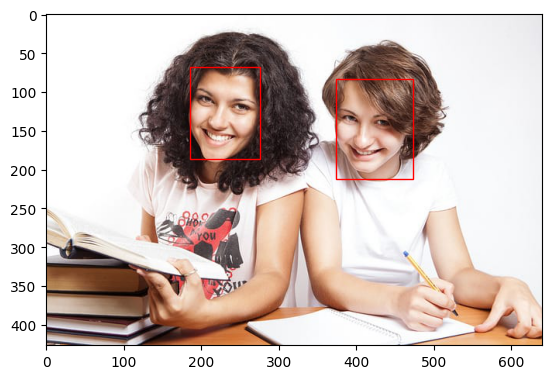

In [84]:
deepBbox(filename1)

3/3 [==============================] - 0s 36ms/step


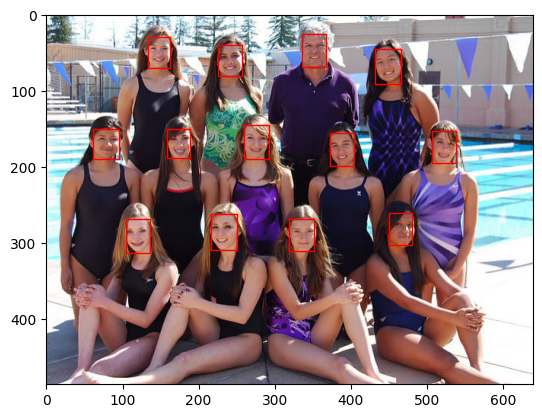

In [85]:
deepBbox(filename2)

In [86]:
# keypoint detect

In [95]:
def detectKeypoint(img):
  image = plt.imread(img)
  plt.imshow(image)
  ax= plt.gca()
  results = deepDetect(img)
  for result in results:
    for key, value in result['keypoints'].items():
      dot = Circle(value, radius=3, color='red')
      ax.add_patch(dot)

1/1 [==============================] - 0s 159ms/step


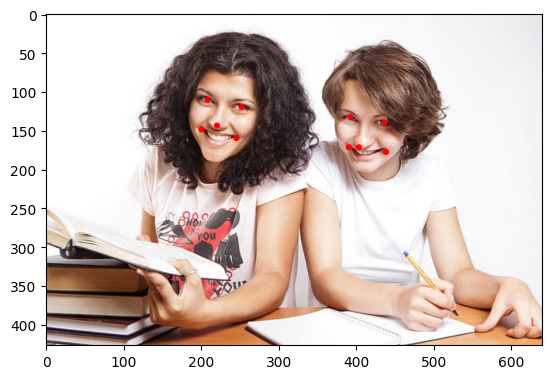

In [96]:
detectKeypoint(filename1)

3/3 [==============================] - 0s 28ms/step


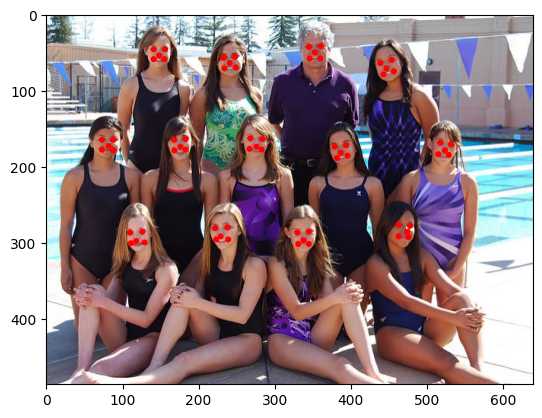

In [97]:
detectKeypoint(filename2)

In [98]:
# extract faces

In [107]:
def extractFaces(img):
  results = deepDetect(img)
  image = plt.imread(img)

  for i in range(len(results)):
    x,y,w,h = results[i]['box']
    plt.subplot(1, len(results), i+1)
    plt.axis('off')
    plt.imshow(image[y:(y+h),x:(x+w)])
  plt.show()

1/1 [==============================] - 0s 160ms/step


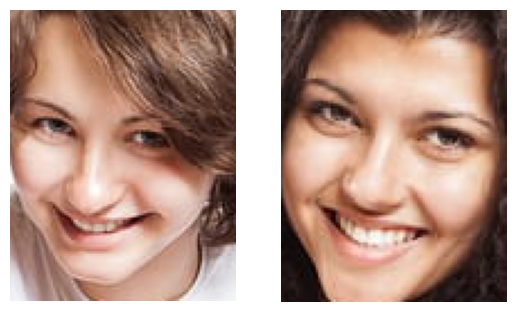

In [108]:
extractFaces(filename1)

3/3 [==============================] - 0s 28ms/step


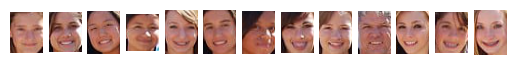

In [109]:
extractFaces(filename2)